In [1]:
import pandas as pd

# Set the maximum number of rows to display to 5
pd.set_option('display.max_rows', 10)

# Creating DataFrame

In [2]:
# Empty Dataframe

df = pd.DataFrame(columns=['Name', 'Grade'])
df

,Name,Grade


In [3]:
# List of Lists

lst = [['Name', 'Grade'],['Sandeep', 'F'],['Sam', 'A+']]

df = pd.DataFrame(lst[1:], columns=lst[0])
df

,Name,Grade
0,Sandeep,F
1,Sam,A+


In [4]:
# Dictionary
# Keys - Column Names
# Values - List - Row Items

dic = {
     'Names' : ['Sandeep', 'Sam']
    ,'Grade' : ['F', 'A+']
}

df = pd.DataFrame(dic)
df

,Names,Grade
0,Sandeep,F
1,Sam,A+


In [5]:
# Reading Data
pokemon_url = 'https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv'

df = pd.read_csv(pokemon_url)

# Exploring DataFrame

In [6]:
# Sample Data
df.tail(5)
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [7]:
# Num of Rows and Columns
df.shape

(800, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
# Stats
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
# Unique Values
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
             ... 
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
Length: 13, dtype: int64

In [11]:
# Null Values
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
             ... 
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Length: 13, dtype: int64

# Filtering Data

In [12]:
# Boolean Indexing

df[['Name', 'Type 1']]

df[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison')]

df[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison')][['Name', 'HP']]

,Name,HP
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,VenusaurMega Venusaur,80
48,Oddish,45
...,...,...
344,Roselia,50
451,Budew,40
452,Roserade,60
651,Foongus,69


In [13]:
# Query

df.query("`Type 1` == 'Fire'")

max_hp = 200

df.query('HP > @max_hp')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [14]:
# loc and iloc

df.loc[0:10:3,'Name':'Speed']

df.loc[[0,6,9],['Name', 'Type 1', 'HP', 'Attack', 'Speed']]

df.iloc[0:100:3, 0:10:2]

,#,Type 1,Total,Attack,Sp. Atk
0,1,Grass,318,49,65
3,3,Grass,625,100,122
6,6,Fire,534,84,109
9,7,Water,314,48,50
12,9,Water,630,103,135
...,...,...,...,...,...
87,80,Water,590,75,130
90,83,Normal,352,65,58
93,86,Water,325,45,45
96,89,Poison,500,105,65


# Sorting 

In [15]:
df.sort_index()
df[['Name', 'HP', 'Attack']].sort_values(by = ['HP', 'Attack'], ascending = [False, True])

,Name,HP,Attack
261,Blissey,255,10
121,Chansey,250,5
217,Wobbuffet,190,33
351,Wailord,170,90
655,Alomomola,165,75
...,...,...,...
487,Mime Jr.,20,25
186,Pichu,20,40
388,Duskull,20,40
55,Diglett,10,55


# Derived Columns

In [16]:
df['Special_Index'] = df['HP'] * df ['Attack']
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special_Index
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2205
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,3720
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,6560
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,8000
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,5000
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,8000
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,8800
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,12800


In [17]:
df.rename(columns = {'Special_Index': 'power_index'})

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,power_index
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2205
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,3720
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,6560
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,8000
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,5000
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,8000
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,8800
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,12800


# Aggregations

In [18]:
df.HP.mean()

69.25875

In [19]:
df[df.HP == df.HP.min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special_Index
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,90


In [20]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Special_Index
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,5821.158750
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,3724.069946
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,90.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,3000.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,5100.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,7906.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,24000.000000


In [21]:
df.agg(
{
    'HP': ['min', 'max']
    ,'Attack' : ['mean']
    ,'Defense' : ['median'] 
}
)

,HP,Attack,Defense
min,1.0,NaN,NaN
max,255.0,NaN,NaN
mean,NaN,79.00125,NaN
median,NaN,NaN,70.0


In [22]:
df.groupby('Type 1').mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special_Index
Type 1,,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,4370.333333
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,6125.709677
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,9925.250000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,4421.659091
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,5089.235294
...,...,...,...,...,...,...,...,...,...,...,...
Poison,251.785714,399.142857,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,0.000000,5291.607143
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614,5356.421053
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,6465.977273


In [23]:
df.groupby(['Type 1', 'Type 2'])['HP', 'Attack', 'Defense'].mean()

<ipython-input-23-5cd67bc49d54>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Type 1', 'Type 2'])['HP', 'Attack', 'Defense'].mean()


HP      Attack     Defense
Type 1 Type 2                                     
Bug    Electric  60.000000   62.000000   55.000000
       Fighting  80.000000  155.000000   95.000000
       Fire      70.000000   72.500000   60.000000
       Flying    63.000000   70.142857   61.571429
       Ghost      1.000000   90.000000   45.000000
...                    ...         ...         ...
Water  Ice       90.000000   83.333333  113.333333
       Poison    61.666667   68.333333   58.333333
       Psychic   87.000000   73.000000  104.000000
       Rock      70.750000   82.750000  112.750000
       Steel     84.000000   86.000000   88.000000

[136 rows x 3 columns]

In [24]:
df.pivot_table(values = 'HP', index = 'Type 1', columns = 'Type 2', aggfunc= 'max')

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,70.0,NaN,80.0,85.0,86.0,1.0,75.0,60.0,NaN,NaN,70.0,NaN,70.0,75.0,40.0
Dark,NaN,NaN,92.0,NaN,NaN,65.0,75.0,126.0,50.0,NaN,NaN,70.0,NaN,NaN,86.0,NaN,65.0,NaN
Dragon,NaN,NaN,NaN,100.0,75.0,NaN,100.0,105.0,NaN,NaN,108.0,125.0,NaN,NaN,80.0,NaN,NaN,NaN
Electric,NaN,NaN,90.0,NaN,67.0,NaN,50.0,90.0,50.0,50.0,NaN,50.0,62.0,NaN,NaN,NaN,70.0,50.0
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Poison,40.0,103.0,65.0,NaN,NaN,83.0,NaN,85.0,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0
Psychic,NaN,80.0,NaN,NaN,68.0,106.0,100.0,106.0,80.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock,75.0,100.0,82.0,NaN,50.0,91.0,NaN,80.0,NaN,86.0,80.0,123.0,NaN,NaN,70.0,NaN,60.0,72.0


# Combining DataFrames

In [25]:
fire_pokemon = df[df['Type 1'] == 'Fire']
water_pokemon = df[df['Type 1'] == 'Water']

In [26]:
fire_water_pokemon = pd.concat([fire_pokemon, water_pokemon], axis = 0, keys = ['fire','water'])
fire_water_pokemon

#                       Name Type 1  Type 2  Total  HP  Attack  \
fire  4      4                 Charmander   Fire     NaN    309  39      52   
      5      5                 Charmeleon   Fire     NaN    405  58      64   
      6      6                  Charizard   Fire  Flying    534  78      84   
      7      6  CharizardMega Charizard X   Fire  Dragon    634  78     130   
      8      6  CharizardMega Charizard Y   Fire  Flying    634  78     104   
...        ...                        ...    ...     ...    ...  ..     ...   
water 724  656                    Froakie  Water     NaN    314  41      56   
      725  657                  Frogadier  Water     NaN    405  54      63   
      726  658                   Greninja  Water    Dark    530  72      95   
      762  692                  Clauncher  Water     NaN    330  50      53   
      763  693                  Clawitzer  Water     NaN    500  71      73   

           Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
fire  4         43       60       50     65           1      False   
      5         58       80       65     80           1      False   
      6         78      109       85    100           1      False   
      7        111      130       85    100           1      False   
      8         78      159      115    100           1      False   
...            ...      ...      ...    ...         ...        ...   
water 724       40       62       44     71           6      False   
      725       52       83       56     97           6      False   
      726       67      103       71    122           6      False   
      762       62       58       63     44           6      False   
      763       88      120       89     59           6      False   

           Special_Index  
fire  4             2028  
      5             3712  
      6             6552  
      7            10140  
      8             8112  
...                  ...  
water 724           2296  
      725           3402  
      726           6840  
      762           2650  
      763           5183  

[164 rows x 14 columns]

In [27]:
hindi_names = pd.DataFrame({'English':['Fire', 'Water'], 'Hindi': ['Agni', 'Pani']})
hindi_names

,English,Hindi
0,Fire,Agni
1,Water,Pani


In [28]:
pd.merge(fire_water_pokemon, hindi_names, how = 'outer', left_on = 'Type 1', right_on = 'English')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special_Index,English,Hindi
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2028,Fire,Agni
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,3712,Fire,Agni
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,6552,Fire,Agni
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,10140,Fire,Agni
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,8112,Fire,Agni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,656,Froakie,Water,NaN,314,41,56,40,62,44,71,6,False,2296,Water,Pani
160,657,Frogadier,Water,NaN,405,54,63,52,83,56,97,6,False,3402,Water,Pani
161,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False,6840,Water,Pani
162,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False,2650,Water,Pani


# Plotting
1. Line
2. Bar
3. Histogram
4. Pie
5. Scatter
6. Area
7. Box Plot
8. KDE


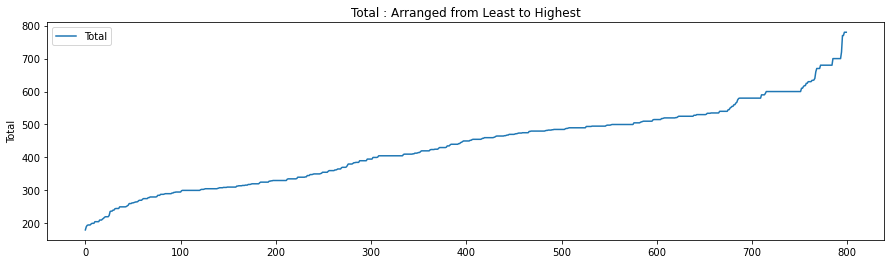

In [29]:
# Line
index_v_total = df.Total.sort_values().reset_index()

index_v_total
index_v_total.plot(
    kind = 'line'
    , y='Total'
    , figsize = (15,4)
    , title = 'Total : Arranged from Least to Highest'
    , ylabel = 'Total'
);

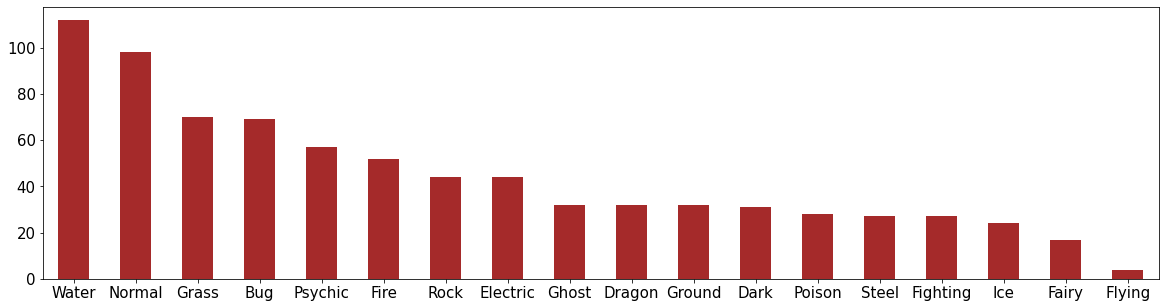

In [30]:
# Bar

count_of_pokemon = df['Type 1'].value_counts()
count_of_pokemon.plot(
     kind = 'bar'
    , figsize = (20,5) 
    ,fontsize = 15
    ,rot = 0
    ,color = 'brown'

);

<AxesSubplot:ylabel='Frequency'>

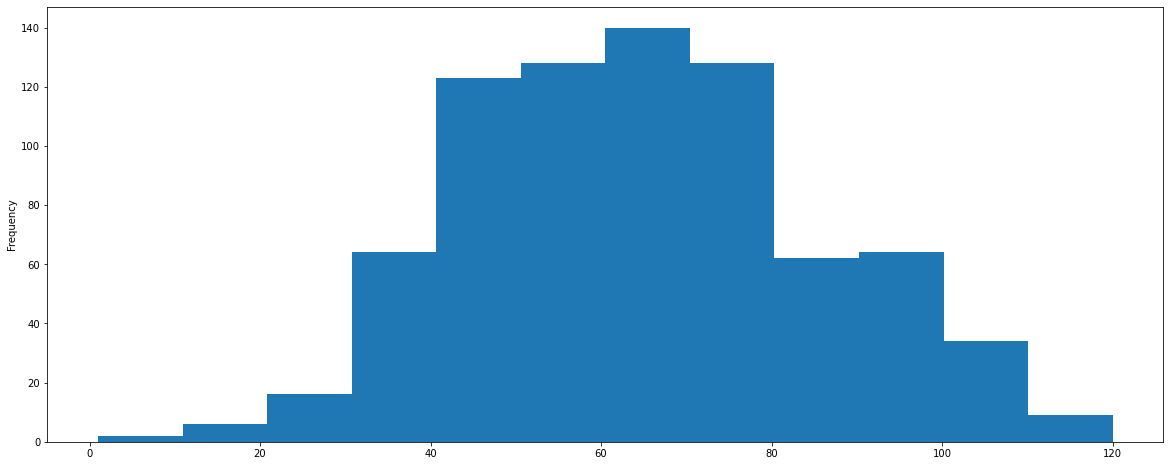

In [31]:
# Histogram

HP_buckets = df[df['HP'].between(0,120)]['HP']

HP_buckets.plot(
    kind = 'hist'
    ,figsize = (20,8)
    ,bins = 12
)

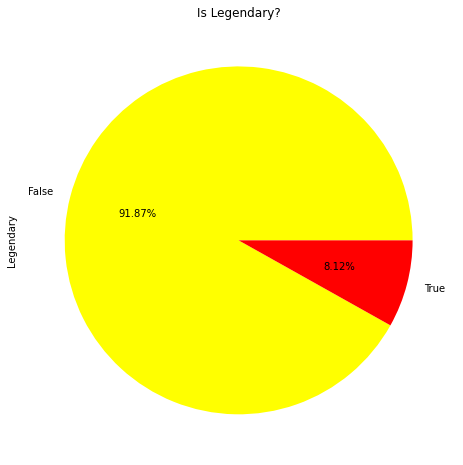

In [32]:
# Pie

legendary_split = df.Legendary.value_counts()

legendary_split.plot(
    kind = 'pie'
    ,figsize = (8,8)
    ,colors = ['Yellow', 'Red']
    ,autopct = '%0.2f%%'
    ,title = 'Is Legendary?'
);

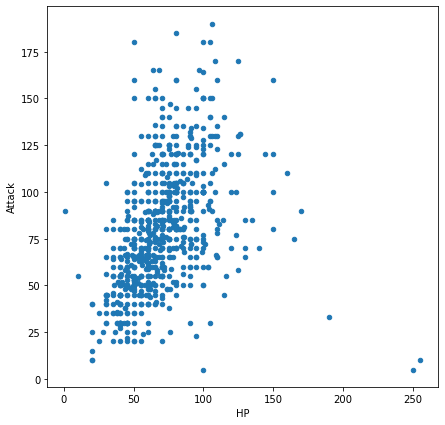

In [33]:
# Scatter

HPvAttack = df[['HP', 'Attack']]

HPvAttack.plot(
    kind = 'scatter'
    ,x = 'HP'
    ,y = 'Attack'
    ,figsize = (7,7)
);

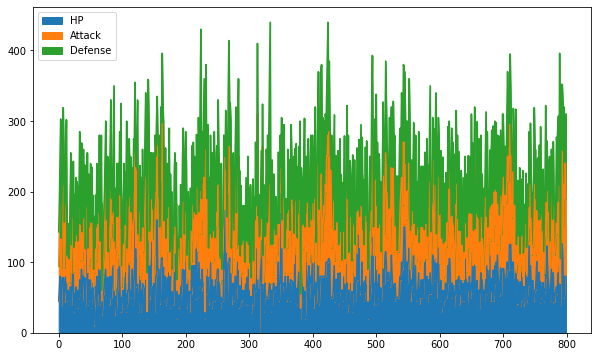

In [34]:
# Area
Stats = df[['HP', 'Attack', 'Defense']]
Stats.plot(
    kind = 'area'
    ,figsize = (10,6)
);

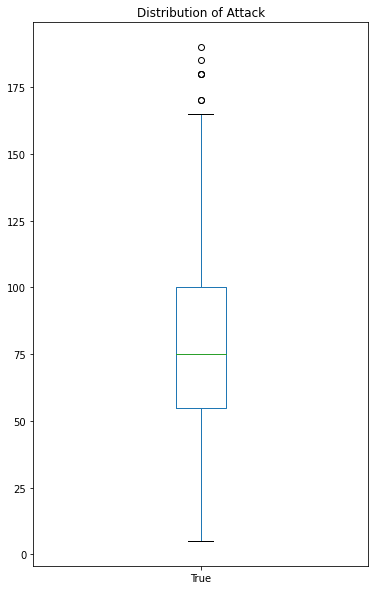

In [35]:
# Box

Attack = df.Attack

Attack.plot(
kind = 'box'
    ,figsize = (6,10)
    ,label = True
    ,title = 'Distribution of Attack'
);

/Users/sandeep/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


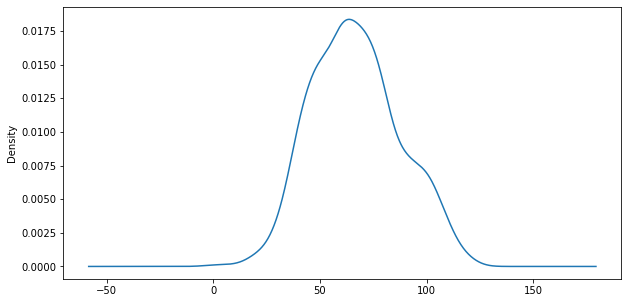

In [36]:
# KDE

HP_buckets = df[df['HP'].between(0,120)]['HP']

HP_buckets.plot(
    kind = 'kde'
    ,figsize = (10,5)
);

# Practice Questions

1. What's the most common type 1 of Legendary Pokemons?
2. How do the base stats of Generation 1 Pokémon compare to those of Generation 2 Pokémon?
3. Which type combination is the most common among non-Legendary Pokémon?
4. Highest HP pokemon for each Type 1?
5. What are the top 10 Pokémon with the highest Special Attack stats, and what types are they associated with?